In [47]:
## FFR120
# Felix Waldschock 2023

## Exercise 2.1 Two dimensional gas in a box  

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [49]:
N = int(10e5)
kB = 1
T = 1
Eb = 2 * kB * T 


states = ["Left", "Middle", "Right"]

stateTrajectory = []
energyTrajectory = []

sum p_i:  1.0


<BarContainer object of 3 artists>

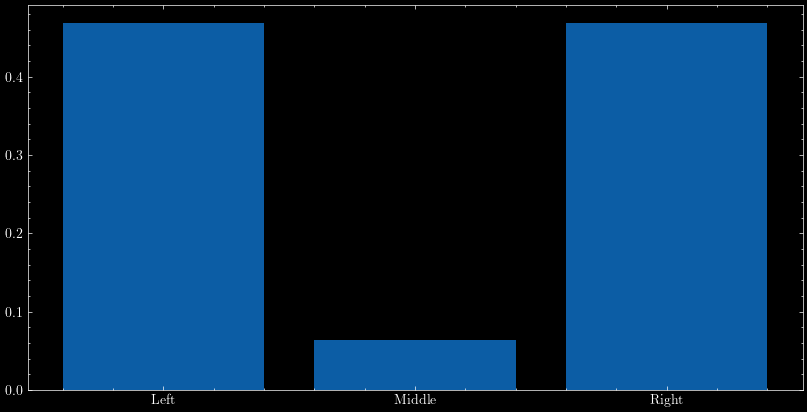

In [50]:
E0 = 0
E1 = Eb
E2 = 0

# compute Z
Z = 2 + np.exp(-Eb / (kB * T))  # 2.135

# compute the probability of changing state for each state
P0 = 1 / Z
P1 = np.exp(-Eb / (kB * T)) / Z
P2 = 1 / Z
print('sum p_i: ', P0 + P1 + P2)

# init state
state = "Left"
E = E0

energyTrajectory.append(E)
stateTrajectory.append(state)

# plot the probrability distribution
plt.figure(figsize=(10, 5))
plt.bar(states, [P0, P1, P2])


In [51]:

def changeProbability(state, E):
    r = np.random.random()
    
    # check in which state r lays
    cumSumP = np.cumsum([P0, P1, P2])
    if r < cumSumP[0]:
        new_state = "Left"
    elif r < cumSumP[1]:
        new_state = "Middle"
    else:
        new_state = "Right"
    
    # check if transition is allowed
    if state == "Left" and new_state == "Middle":
        state = "Middle"
        E = E1
    elif state == "Middle" and new_state == "Left":
        state = "Left"
        E = E0
    elif state == "Middle" and new_state == "Right":
        state = "Right"
        E = E2
    elif state == "Right" and new_state == "Middle":
        state = "Middle"
        E = E1
    else:
        state = state
        E = E

    
    return state, E      

Number of 1s:  63514


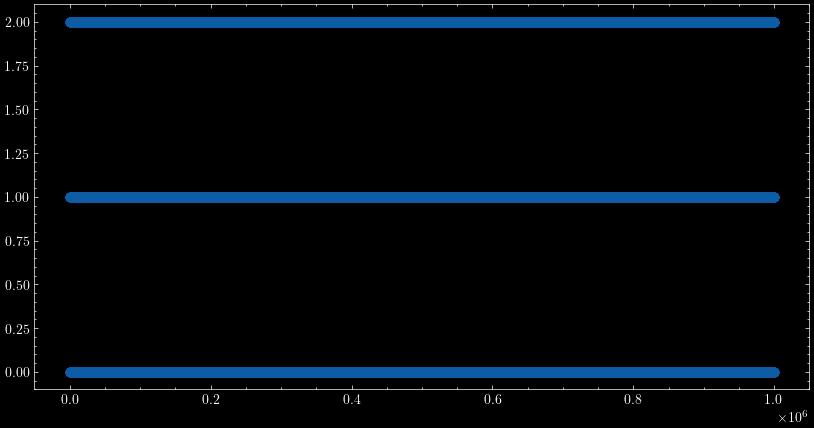

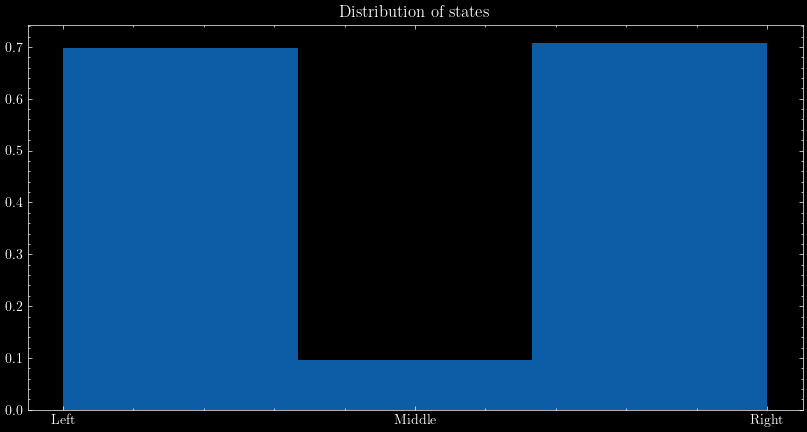

In [52]:

for i in range(N):
    state, E = changeProbability(state, E)
    energyTrajectory.append(E)
    stateTrajectory.append(state)
        
# convert to numpy array
stateTrajectory = np.array(stateTrajectory)

stateTrajectory_Numbers = stateTrajectory.copy()
# convert to numbers
stateTrajectory_Numbers[stateTrajectory_Numbers == "Left"] = 0
stateTrajectory_Numbers[stateTrajectory_Numbers == "Middle"] = 1
stateTrajectory_Numbers[stateTrajectory_Numbers == "Right"] = 2
stateTrajectory_Numbers = stateTrajectory_Numbers.astype(int)

# plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(stateTrajectory_Numbers, 'o')

# plot the histogram
plt.figure(figsize=(10, 5))
plt.title("Distribution of states")
plt.hist(stateTrajectory, bins=3, density=True)

# how many 1s are in the array
print("Number of 1s: ", np.sum(stateTrajectory_Numbers == 1))

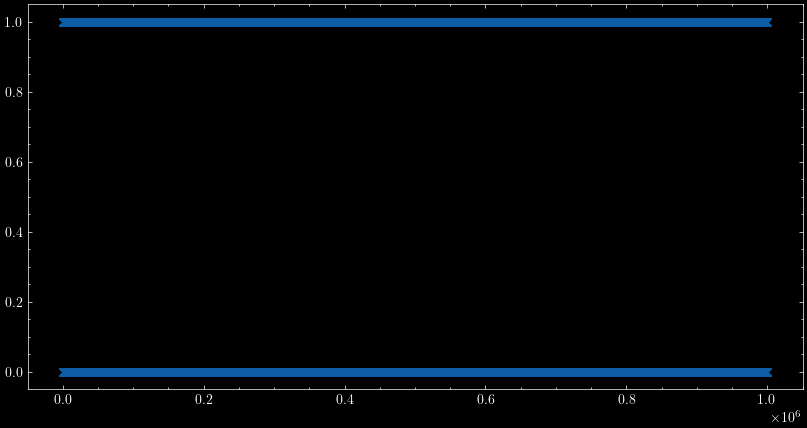

In [53]:
# plot energy 
plt.figure(figsize=(10, 5))
plt.plot(np.array(energyTrajectory)/Eb, 'x')

In [54]:
# after how many steps is left and right in equilibrium, do not include the first step
# loop over state trajectory and sum lefts and rights 
def findTimeOfEquilibrium(stateTrajectoryArray):
    LeftCounter = 0
    RightCounter = 0
    for i in range(len(stateTrajectoryArray)):
        if stateTrajectoryArray[i] == "Left":
            LeftCounter += 1
        elif stateTrajectoryArray[i] == "Right":
            RightCounter += 1
        
        if LeftCounter > 0 and RightCounter > 0:
            if LeftCounter == RightCounter:
                return i
                break
StepsUntilEquilibrium = findTimeOfEquilibrium(stateTrajectory)
print("Equilibrium after {} steps".format(StepsUntilEquilibrium))

Equilibrium after 493 steps


# Transition frequency

In [55]:
def calculateChangingFrequency(array):
    count = 0
    for i in range(1, len(array)):
        if array[i] != array[i - 1]:
            count += 1
    freq = len(array) / count
    return freq

In [56]:
# vary eB and determine how it affects the frequency of changes
M = 100 # number of different values of eB
eB_ = np.logspace(-5, 5, M)
N = 1000 # number of iterations
frequencyTrajectory = np.zeros(M)
StepsUntilEquilibrium = np.zeros(M)


for j in range(M):
    state = "Left"
    E = 0
    stateTrajectory = []
    energyTrajectory = []
    stateTrajectory.append(state)
    energyTrajectory.append(E)
    for i in range(N):
        state, E = changeProbability(state, E)
        energyTrajectory.append(E)
        stateTrajectory.append(state)
    frequencyTrajectory[j] = calculateChangingFrequency(stateTrajectory)
    StepsUntilEquilibrium[j] = findTimeOfEquilibrium(stateTrajectory)

    

Text(0, 0.5, 'Steps until equilibrium')

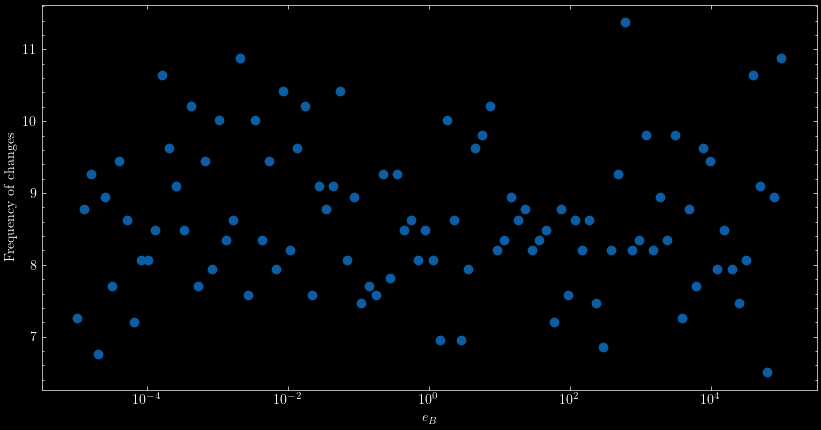

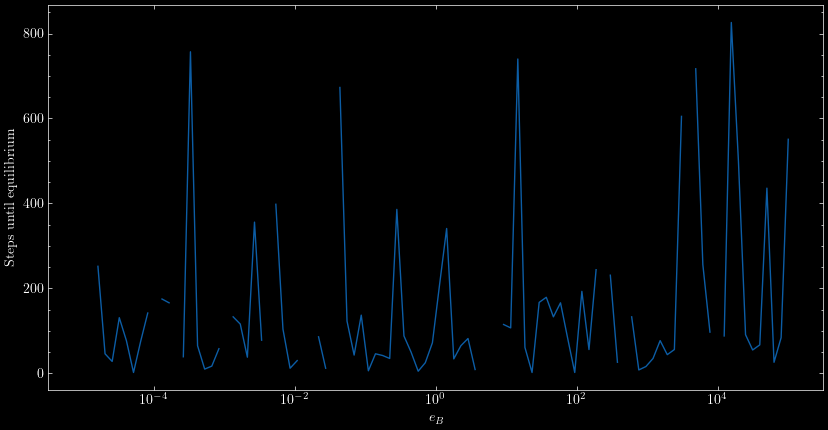

In [58]:
plt.figure(figsize=(10, 5))
plt.semilogx(eB_, frequencyTrajectory, 'o')
plt.xlabel(r"$e_B$")
plt.ylabel("Frequency of changes")

plt.figure(figsize=(10, 5))
plt.semilogx(eB_, StepsUntilEquilibrium)
plt.xlabel(r"$e_B$")
plt.ylabel("Steps until equilibrium")